# [RecipeBox](https://eightportions.com/datasets/Recipes/)

Analysis of dataset should contain: 
* [Plantuml](https://plantuml.com/de/json) diagram of json structure 
* Amount of recipes
* Plots:
 * Num of Instructions
 * Num of Ingredients
 * Most used words in Instructions
 * Most used words in Ingedients
 * (Optional) Kind of dish


In [35]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_ar = open('.recipeBox/recipes_raw_nosource_ar.json')
data_ar = json.load(file_ar)

file_epi = open('.recipeBox/recipes_raw_nosource_epi.json')
data_epi = json.load(file_epi)

file_fn = open('.recipeBox/recipes_raw_nosource_fn.json')
data_fn = json.load(file_fn)

data = {**data_ar, **data_epi, **data_fn}

In [4]:
data_stripped = {k: v for k, v in data.items() if v}

In [8]:
# Analysis
## Length of the dataset
print('Amount of recipes: ' + str(len(data_stripped)))


sumInstructions = 0
sumIngredients = 0
for value in data_stripped.values():
    sumIngredients = sumIngredients + len(value['ingredients'])
    if value['instructions']:
        sumInstructions = sumInstructions + len(value['instructions'].split("."))

print('Amount of Ingredients: ' + str(sumIngredients))
print('Amount of Instructions: ' + str(sumInstructions))

Amount of recipes: 124647
Amount of Ingredients: 1316950
Amount of Instructions: 1924048


In [27]:
ingredientsDict = {}

for value in data_stripped.values():
    for ingredient in value['ingredients']:
        charsToRemove = ",.*®©™()"
        ingredientStripped = re.sub("[" + charsToRemove + "]", "", ingredient.lower()).replace('[', '').replace(']','')
        for word in ingredientStripped.split():
            ingredientsDict[word] = ingredientsDict.setdefault(word, 0) + 1


24917
5351


In [33]:

print(len(ingredientsDict))
sortedIngredientsDict = sorted(ingredientsDict.items(), key=lambda x:x[1], reverse=True)
#print(sortedIngredientsDict)


24917
5351


In [51]:

sortedIngredientsDictStripped = {k: v for k, v in sortedIngredientsDict if v > 1}
print(len(sortedIngredientsDictStripped))

13446


In [45]:
ingr = sortedIngredientsDictStripped.keys()
value = sortedIngredientsDictStripped.values()


In [47]:
ingrStripped = list(ingr)[:100]

In [48]:
valueStripped = list(value)[:100]

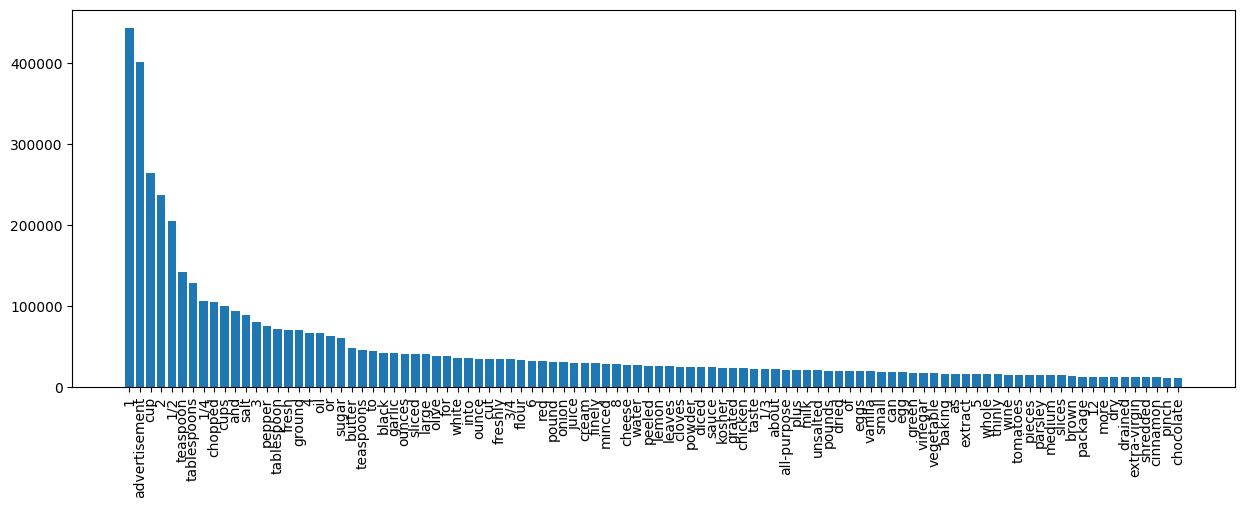

In [50]:

plt.figure(figsize=(15,5), dpi=100)
plt.bar(ingrStripped, valueStripped, align='center')
plt.xticks(rotation='vertical')
plt.show()